In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [4]:
df=pd.read_csv('data_for_lr.csv')

In [5]:
df.columns

Index(['x', 'y'], dtype='object')

In [ ]:
df.info()

In [7]:
df.isna().sum()

x    0
y    1
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

x    0
y    0
dtype: int64

In [13]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [25]:
df1=df.loc[:500]

In [26]:
df1

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
496,86.0,85.032954
497,61.0,60.388231
498,21.0,18.446798
499,81.0,82.188392


In [27]:
df2=df.loc[501:]

In [28]:
df2

,x,y
501,5.0,7.682025
502,61.0,61.018581
503,47.0,53.605622
504,98.0,94.477288
505,30.0,27.964595
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


we need 2 data sets. one for training and other for testing/validation

In [33]:
train_input=np.array(df.x[:500]).reshape(500,1)
train_output=np.array(df.y[0:500]).reshape(500,1)

In [38]:
test_input=np.array(df.x[501:]).reshape(198,1)
test_output=np.array(df.y[501:]).reshape(198,1)

step-1: forward propagation <br>
step-2: cost func <br>
step-3: gradient descent

<b>Forward propagation</b>

linear regression-f(x)=m*x+c

In [61]:
def forward_prop(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    predictions=np.multiply(m,train_input)+c
    return predictions

<b>Cost function</b>

In [40]:
def costfunc(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)/2
    return cost

<b>Gradient descent</b>

In [116]:
def gradientdescent(train_input,train_output,predictions):
    #a stands for alpha
    pto=predictions-train_output
    c1=np.mean(pto)
    m1=np.mean(np.multiply(train_input,pto))
    derivatives=dict()
    derivatives['dm']=m1
    derivatives['dc']=c1
    return derivatives

<b>Update parameters m,c</b>

In [72]:
def update_parameters(parameters,alpha,derivatives):
    
    #alpha-learning rate
    parameters['m']=parameters['m']-alpha*derivatives['dm']
    parameters['c']=parameters['c']-alpha*derivatives['dc']
    return parameters

<b>Model training</b>

In [117]:
def train(train_input,train_output,learningrate,iters):
    #random parameters
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)
    parameters['c']=np.random.uniform(0,1)
    plt.figure()
    loss=list()
    #iteration
    for i in range(iters):
        #forward prop
        predictions=forward_prop(train_input,parameters)
        #cost func
        cost=costfunc(predictions,train_output)
        loss.append(cost)
        print('cost:',cost)
        #gradient descent
        derivatives=gradientdescent(train_input,train_output,predictions)
        #updation
        parameters=update_parameters(parameters,learningrate,derivatives)
        # Plotting
        plt.figure()
        plt.plot(train_input, train_output, '+', label='Actual')
        plt.plot(train_input, predictions, '*', label='Training')
        plt.legend()
        plt.show() 
    return parameters,loss


### Training

cost: 235.96212920307053


<Figure size 640x480 with 0 Axes>

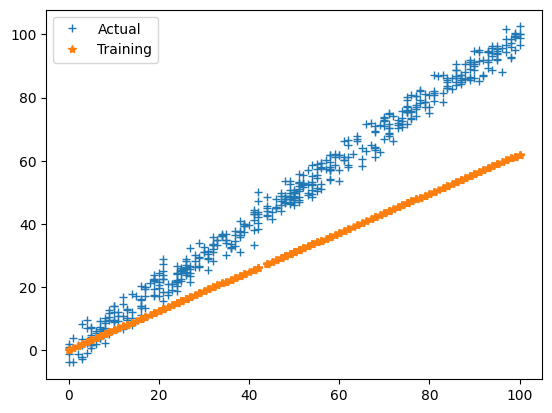

cost: 109.20255140667071


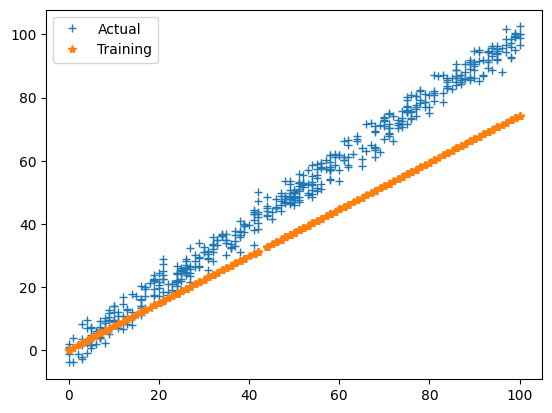

cost: 51.69159005023484


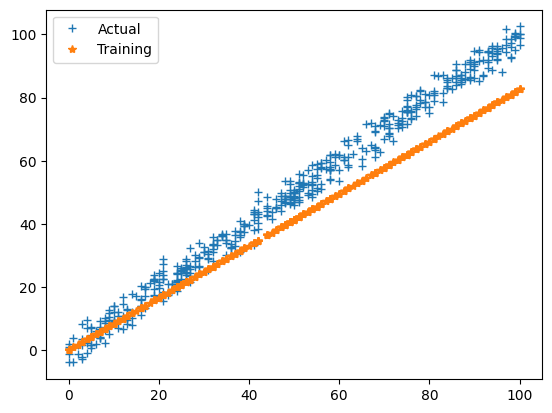

cost: 25.598802675257698


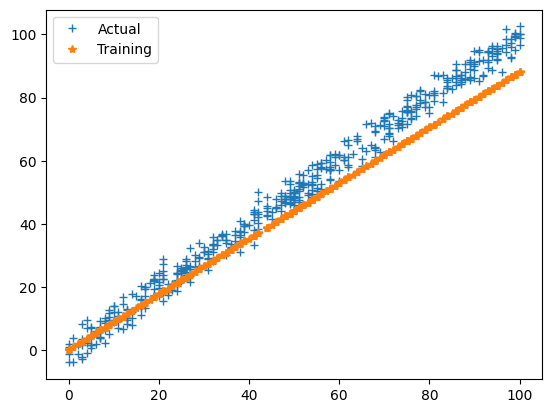

cost: 13.760475635758244


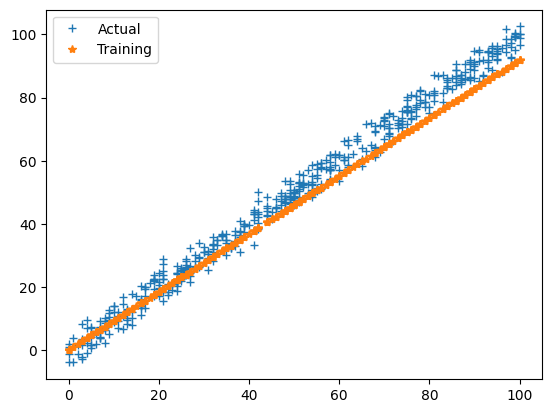

cost: 8.389413039318228


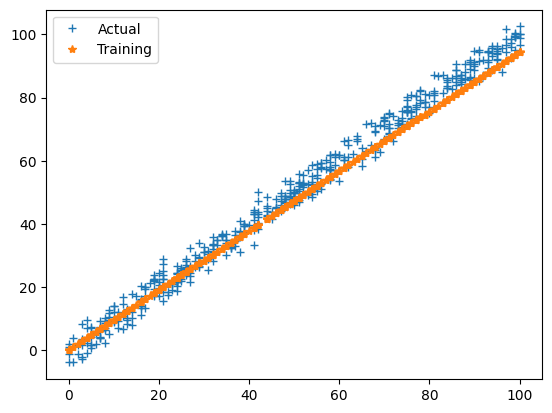

cost: 5.952555484128453


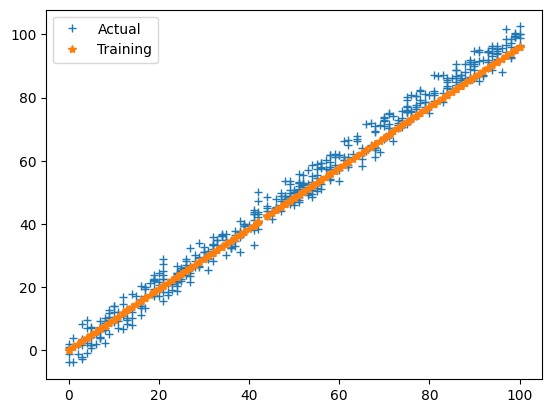

cost: 4.846950006225804


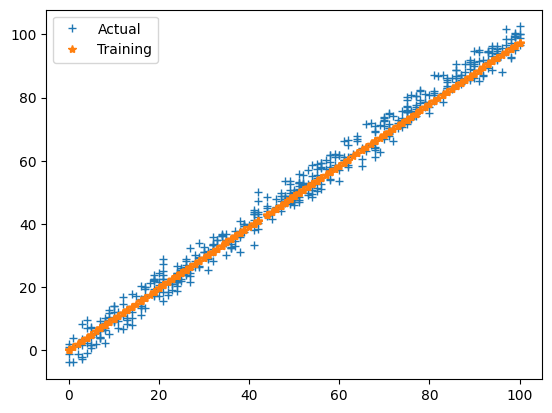

cost: 4.345335070363488


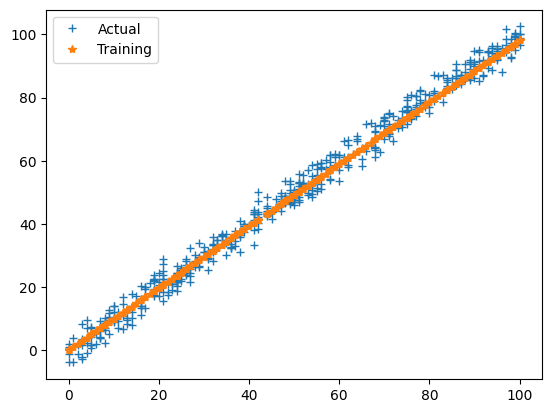

cost: 4.117751312455175


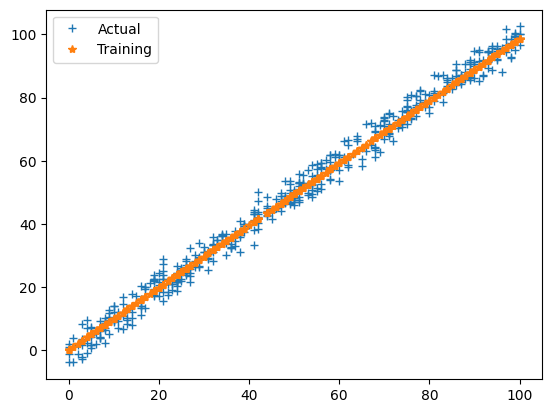

cost: 4.014495803538307


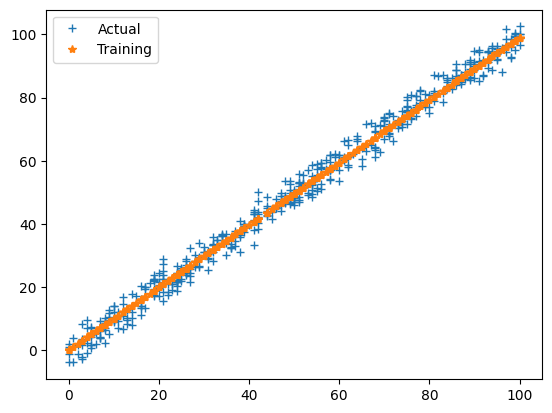

cost: 3.9676481589254227


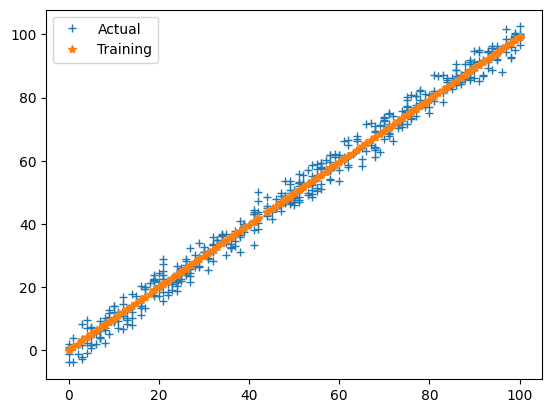

cost: 3.94639282485242


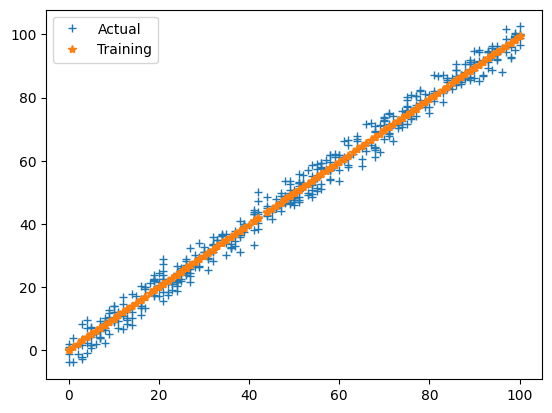

cost: 3.936748750443938


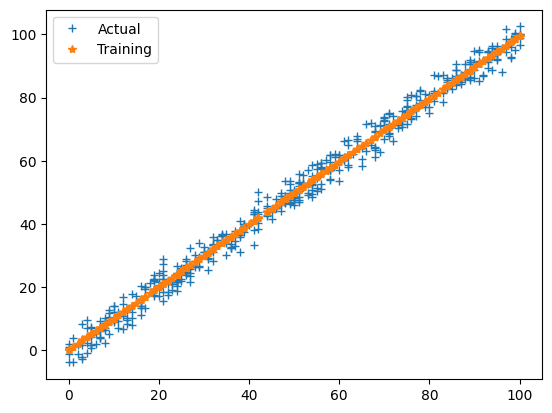

cost: 3.9323727174318366


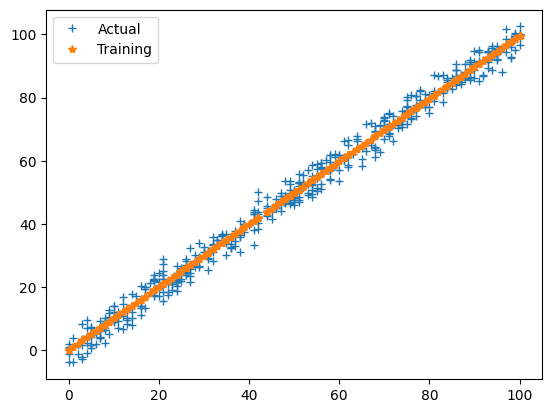

cost: 3.9303868006618505


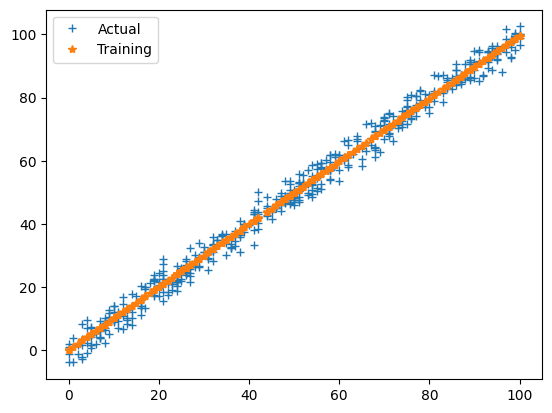

cost: 3.929485282303779


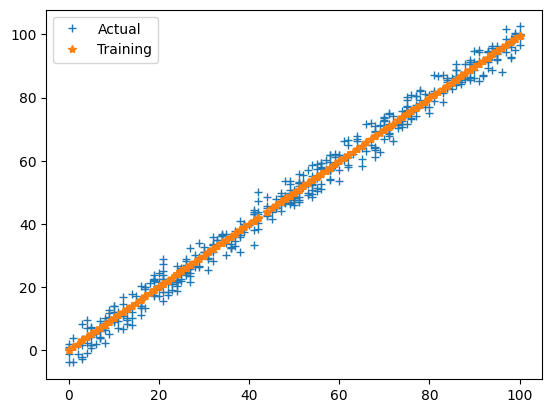

cost: 3.9290757567317933


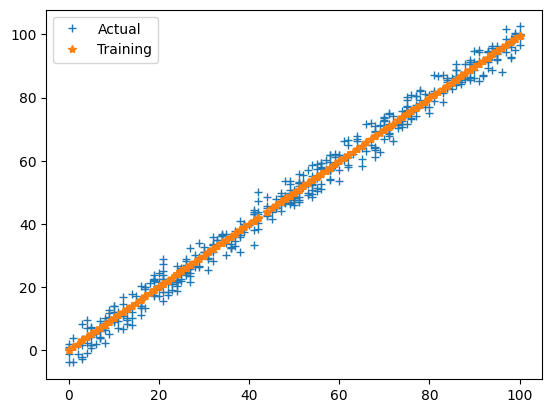

cost: 3.928889448857279


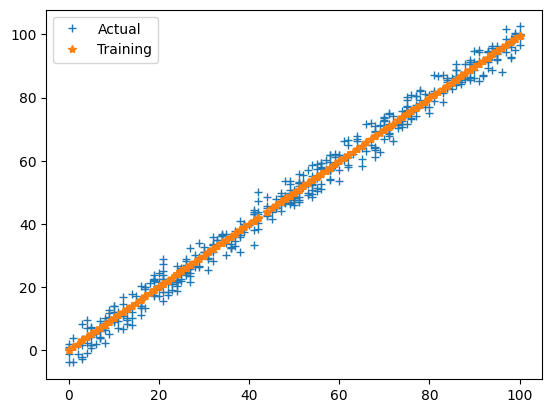

cost: 3.928804415124825


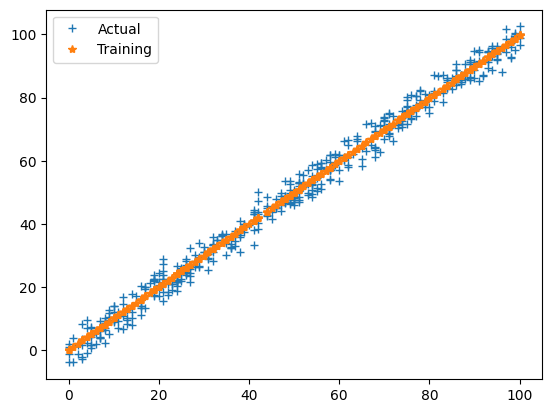

In [121]:
parameters,loss=train(train_input,train_output,0.0001,20)

In [122]:
print(parameters)

{'m': 0.9950772285522064, 'c': 0.14588219503329394}


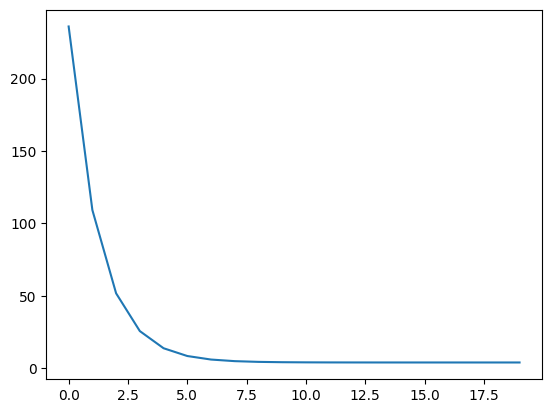

In [136]:
plt.plot(loss)

<b>prediction</b>

In [134]:
test_prediction=test_input*parameters['m']+parameters['c']

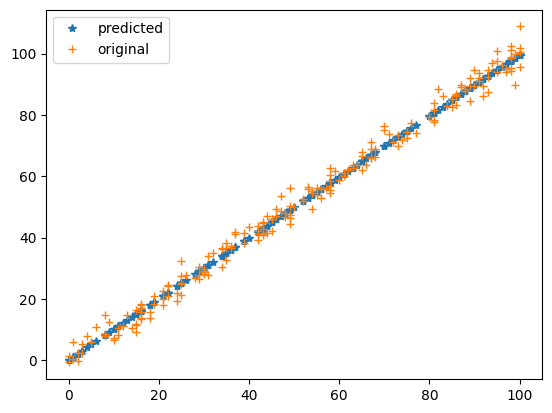

In [135]:
plt.figure()
plt.plot(test_input,test_prediction,'*',label='predicted')
plt.plot(test_input,test_output,'+',label='original')
plt.legend()
plt.show()

<b>calculating cost for training data</b>

In [153]:
cost_test=costfunc(test_prediction,test_output)
print(cost_test)

3.997272099378824
